> # <span style="font-family: JetBrains Mono; color:SteelBlue">IMPORT</span>

In [1]:
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
plt.style.use('fivethirtyeight')

> # <span style="font-family: JetBrains Mono; color:SteelBlue">IDO (2010 januar elsejetol napjainkig)</span>

In [2]:
start = dt.datetime(2010,1,1)
end = dt.datetime.now()

> # <span style="font-family: JetBrains Mono; color: SteelBlue">RESZVENYEK</span>

In [3]:
#Pfizer - PFE (Egeszsegugy)
#Oracle - ORCL (Informatika)
#NextEra Energy - NEE (Megujulo energia)
#Financial Select Sector SPDR Fund - XLF (Penzugy)
#Honeywell International Inc - HON (Ipar)

assets = ['PFE', 'ORCL', 'NEE', 'XLF', 'HON']

dataframe = pd.DataFrame()

for stock in assets:
    dataframe[stock] = web.DataReader(stock, data_source='yahoo', start=start, end=end)['Close']

> # <span style="font-family: JetBrains Mono; color: SteelBlue">VIZUALIZALAS</span>

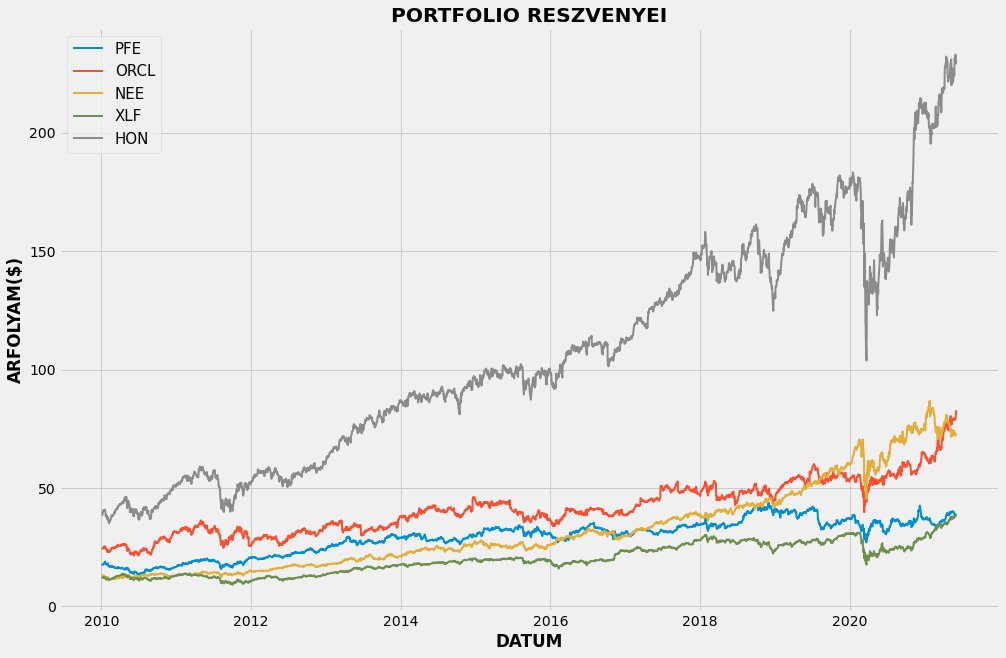

In [4]:
plt.figure(figsize=(15,10))

for t in dataframe.columns.values:
    plt.plot(dataframe[t], label = t, lw=2)
    plt.title('PORTFOLIO RESZVENYEI', fontweight='bold')

plt.xlabel('DATUM', fontweight='bold')
plt.ylabel('ARFOLYAM($)', fontweight='bold')
plt.legend(fontsize=15)
plt.show()

> # <span style="font-family: JetBrains Mono; color: SteelBlue">SZORAS</span>

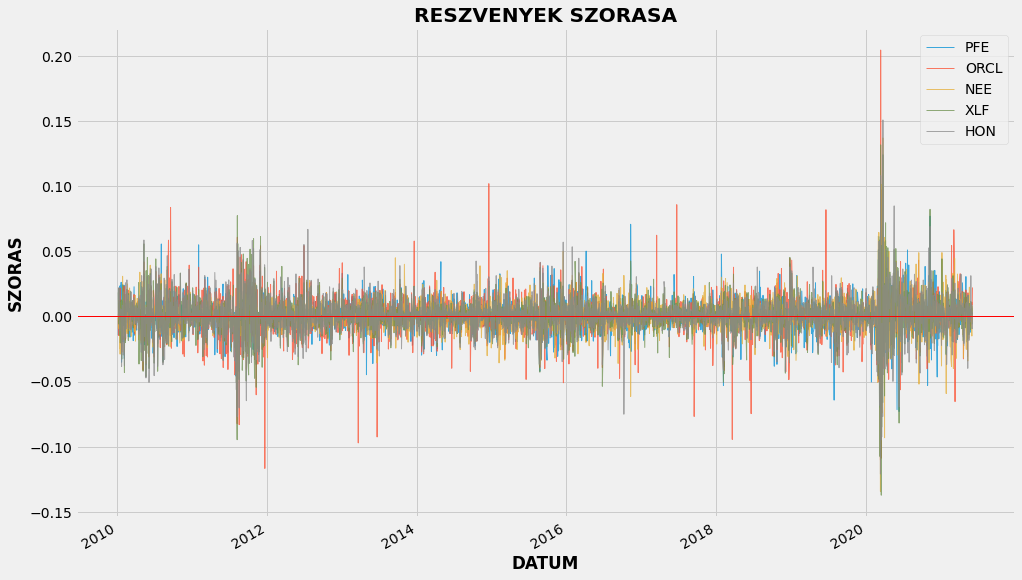

In [5]:
returns = dataframe.pct_change()
returns.plot(figsize=(15,10), lw=1, alpha = 0.75)
plt.title('RESZVENYEK SZORASA', fontweight='bold')
plt.xlabel('DATUM', fontweight='bold')
plt.ylabel('SZORAS', fontweight='bold')
plt.axhline(0, color="red", lw=1)
plt.show()

> # <span style="font-family: JetBrains Mono; color: SteelBlue">KOVARIANCIA MATRIX</span>

In [6]:
# ~250 hetkoznap van egy evben
kov_matrix = returns.cov() * 250
print(kov_matrix)
print('-------------------------------------------------------')
print('PFE - ORCL: {:.2f}'.format(np.sqrt(kov_matrix.iloc[0,1])*100) + '%')
print('------------------')
print('PFE - NEE: {:.2f}'.format(np.sqrt(kov_matrix.iloc[0,2])*100) + '%')
print('------------------')
print('PFE - XLF: {:.2f}'.format(np.sqrt(kov_matrix.iloc[0,3])*100) + '%')
print('------------------')
print('PFE - HON: {:.2f}'.format(np.sqrt(kov_matrix.iloc[0,4])*100) + '%')
print('------------------')
print('ORCL - NEE: {:.2f}'.format(np.sqrt(kov_matrix.iloc[1,2])*100) + '%')
print('------------------')
print('ORCL - XLF: {:.2f}'.format(np.sqrt(kov_matrix.iloc[1,3])*100) + '%')
print('------------------')
print('ORCL - HON: {:.2f}'.format(np.sqrt(kov_matrix.iloc[1,4])*100) + '%')
print('------------------')
print('NEE - XLF: {:.2f}'.format(np.sqrt(kov_matrix.iloc[2,3])*100) + '%')
print('------------------')
print('NEE - HON: {:.2f}'.format(np.sqrt(kov_matrix.iloc[2,4])*100) + '%')
print('------------------')
print('XLF - HON: {:.2f}'.format(np.sqrt(kov_matrix.iloc[3,4])*100) + '%')

           PFE      ORCL       NEE       XLF       HON
PFE   0.041554  0.023148  0.015747  0.025681  0.023745
ORCL  0.023148  0.063817  0.018525  0.035447  0.033059
NEE   0.015747  0.018525  0.040461  0.020789  0.021348
XLF   0.025681  0.035447  0.020789  0.053142  0.042690
HON   0.023745  0.033059  0.021348  0.042690  0.055342
-------------------------------------------------------
PFE - ORCL: 15.21%
------------------
PFE - NEE: 12.55%
------------------
PFE - XLF: 16.03%
------------------
PFE - HON: 15.41%
------------------
ORCL - NEE: 13.61%
------------------
ORCL - XLF: 18.83%
------------------
ORCL - HON: 18.18%
------------------
NEE - XLF: 14.42%
------------------
NEE - HON: 14.61%
------------------
XLF - HON: 20.66%


> # <span style="font-family: JetBrains Mono; color: SteelBlue">KORRELACIOS MATRIX, R<sup>2</sup></span>

In [7]:
korr_matrix = returns.corr()
korr_matrix
r_negyzet = korr_matrix.iloc[:]**2
print('Korrelacios matrix:')
print(korr_matrix)
print('------------------------------------------------------')
print('R-negyzet:')
print(r_negyzet)

Korrelacios matrix:
           PFE      ORCL       NEE       XLF       HON
PFE   1.000000  0.449511  0.384029  0.546492  0.495159
ORCL  0.449511  1.000000  0.364570  0.608688  0.556283
NEE   0.384029  0.364570  1.000000  0.448339  0.451138
XLF   0.546492  0.608688  0.448339  1.000000  0.787192
HON   0.495159  0.556283  0.451138  0.787192  1.000000
------------------------------------------------------
R-negyzet:
           PFE      ORCL       NEE       XLF       HON
PFE   1.000000  0.202060  0.147478  0.298654  0.245182
ORCL  0.202060  1.000000  0.132911  0.370501  0.309451
NEE   0.147478  0.132911  1.000000  0.201008  0.203526
XLF   0.298654  0.370501  0.201008  1.000000  0.619671
HON   0.245182  0.309451  0.203526  0.619671  1.000000


> # <span style="font-family: JetBrains Mono; color: SteelBlue">HA CSAK...</span>

In [8]:
#Pfizer-be:
pfe_ret = np.sum(returns.loc[:, 'PFE'].mean()*250)*100
pfe_vol = np.sqrt(kov_matrix.iloc[0,0])*100
print('A PFE hozama: {:.2f}'.format(pfe_ret)+'%')
print('A PFE szorasa: {:.2f}'.format(pfe_vol)+'%')

print('-----------------------')

#Oracle-be:
orcl_ret = np.sum(returns.loc[:, 'ORCL'].mean()*250)*100
orcl_vol = np.sqrt(kov_matrix.iloc[1,1])*100
print('Az ORCL hozama: {:.2f}'.format(orcl_ret)+'%')
print('Az ORCL szorasa: {:.2f}'.format(orcl_vol)+'%')

print('-----------------------')

#NextEra Energy-be:
nee_ret = np.sum(returns.loc[:, 'NEE'].mean()*250)*100
nee_vol = np.sqrt(kov_matrix.iloc[2,2])*100
print('A NEE hozama: {:.2f}'.format(nee_ret)+'%')
print('A NEE szorasa: {:.2f}'.format(nee_vol)+'%')

print('-----------------------')

#Financial Select Sector SPDR Fund-ba:
xlf_ret = np.sum(returns.loc[:, 'XLF'].mean()*250)*100
xlf_vol = np.sqrt(kov_matrix.iloc[3,3])*100
print('Az XLF hozama: {:.2f}'.format(xlf_ret)+'%')
print('Az XLF szorasa: {:.2f}'.format(xlf_vol)+'%')

print('-----------------------')

#Honeywell International-ba:
hon_ret = np.sum(returns.loc[:, 'HON'].mean()*250)*100
hon_vol = np.sqrt(kov_matrix.iloc[4,4])*100
print('A HON hozama: {:.2f}'.format(hon_ret)+'%')
print('A HON szorasa: {:.2f}'.format(hon_vol)+'%')

A PFE hozama: 8.86%
A PFE szorasa: 20.38%
-----------------------
Az ORCL hozama: 13.67%
Az ORCL szorasa: 25.26%
-----------------------
A NEE hozama: 16.75%
A NEE szorasa: 20.11%
-----------------------
Az XLF hozama: 12.85%
Az XLF szorasa: 23.05%
-----------------------
A HON hozama: 18.33%
A HON szorasa: 23.52%


> # <span style="font-family: JetBrains Mono; color: SteelBlue">PORTFOLIO HOZAM, SZORAS, SHARPE-MUTATO</span>

In [87]:
#Sulyok

weights = np.random.random(len(dataframe.columns)) 
weights /= weights.sum()

#Variancia
port_variance = np.dot(weights.T, np.dot(kov_matrix, weights))

#Szoras
port_volatility = np.sqrt(port_variance)

#Hozam
port_return = np.sum(returns.mean() * weights) * 250

hanyszor = 5000
portfolio_weights = np.zeros((hanyszor, len(dataframe.columns)))
portfolio_return = np.zeros(hanyszor)
portfolio_vol = np.zeros(hanyszor)
portfolio_sharpe = np.zeros(hanyszor)

for i in range(hanyszor):
    weights = np.random.rand(len(dataframe.columns))
    weights /= weights.sum()
    portfolio_weights[i] = weights
    
    portfolio_return[i] = port_return
    portfolio_vol[i] = port_volatility
    portfolio_sharpe[i] = ((portfolio_return[i]) / portfolio_vol[i])
    

#risk_free = 0.01 # 1%
inflacio = 0.03 # 3%
# real hozam: (1+hozam)/(1+inflacio)-1
#real_hozam = ((1 + port_return)/(1 + inflacio)) - 1

print('Hozam: {:.2f}'.format(portfolio_return.max()*100),'%')
print('Szoras: {:.2f}'.format(portfolio_vol.max()*100),'%')
print('Sharpe: {:.2f}'.format(portfolio_sharpe.max()))
print('Sulyok:', np.round(portfolio_weights[portfolio_sharpe.argmax()],4))

print('PFE:', np.round(portfolio_weights[portfolio_sharpe.argmax(),0],4))
print('ORCL:', np.round(portfolio_weights[portfolio_sharpe.argmax(),1],4))
print('NEE:', np.round(portfolio_weights[portfolio_sharpe.argmax(),2],4))
print('XFL:', np.round(portfolio_weights[portfolio_sharpe.argmax(),3],4))
print('HON:', np.round(portfolio_weights[portfolio_sharpe.argmax(),4],4))

Hozam: 13.87 %
Szoras: 18.06 %
Sharpe: 0.77
Sulyok: [0.0663 0.0471 0.1872 0.3622 0.3373]
PFE: 0.0663
ORCL: 0.0471
NEE: 0.1872
XFL: 0.3622
HON: 0.3373


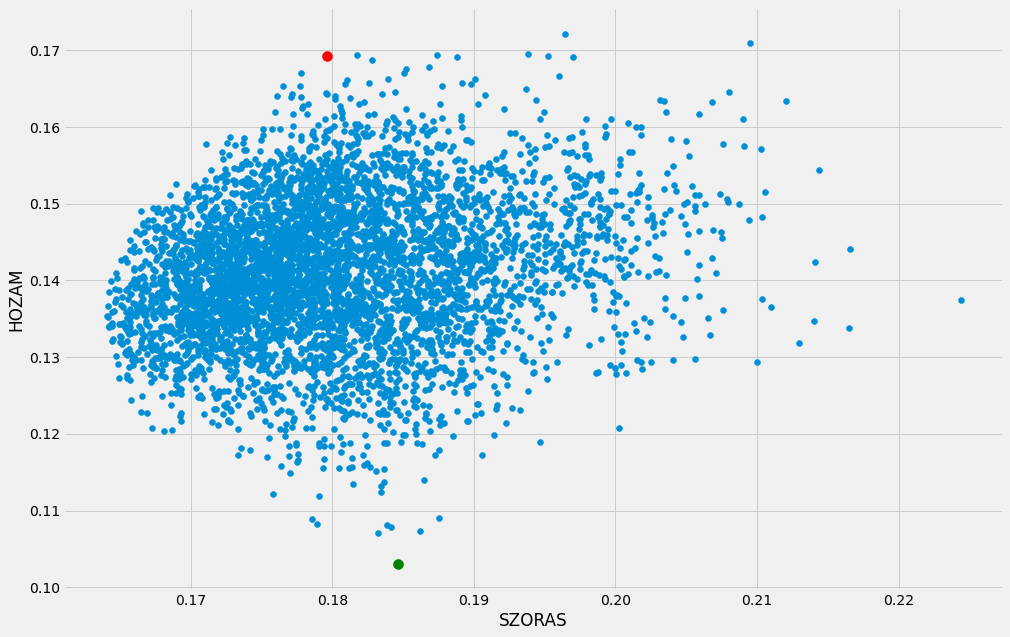

PFE sulya:  0.416
ORCL sulya: 0.379
NEE sulya:  0.187
XLF sulya:  0.002
HON sulya:  0.015


In [11]:
np.random.seed(50)
portfoliok_szama = 5000
all_weights = np.zeros((portfoliok_szama, len(dataframe.columns)))
ret_arr = np.zeros(portfoliok_szama)
vol_arr = np.zeros(portfoliok_szama)
sharpe_arr = np.zeros(portfoliok_szama)

for i in range(portfoliok_szama):
    sulyok = np.random.random(5)
    sulyok /= np.sum(sulyok)

    all_weights[i,:] = sulyok
    ret_arr[i] = np.sum((returns.mean() * sulyok * 250))
    vol_arr[i] = np.sqrt(np.dot(sulyok.T, np.dot(returns.cov() * 250, sulyok)))
    sharpe_arr[i] = ret_arr[i]/vol_arr[i]


max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

min_sr_ret = ret_arr[sharpe_arr.argmin()]
min_sr_vol = vol_arr[sharpe_arr.argmin()]

plt.figure(figsize=(15,10))
plt.scatter(vol_arr, ret_arr)
plt.xlabel('SZORAS')
plt.ylabel('HOZAM')
plt.scatter(max_sr_vol, max_sr_ret, c='red', s=100)
plt.scatter(min_sr_vol, min_sr_ret, c='green', s=100)
plt.show()

print("PFE sulya: ", np.round(all_weights[15,0],3))
print("ORCL sulya:", np.round(all_weights[15,1],3))
print("NEE sulya: ", np.round(all_weights[15,2],3))
print("XLF sulya: ", np.round(all_weights[15,3],3))
print("HON sulya: ", np.round(all_weights[15,4],3))

> # <span style="font-family: JetBrains Mono; color: SteelBlue">MONTE CARLO-MODSZER(Arakra)</span>

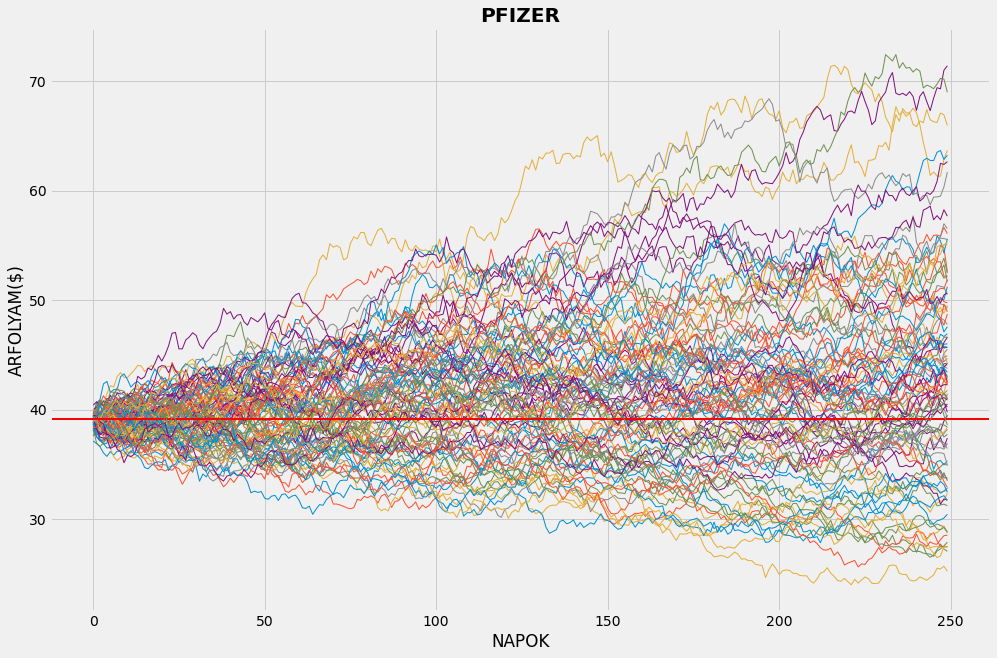

In [12]:
#Pfizer:
n = 100
days = 250 #1 ev

pfe_mu = returns['PFE'].mean()
pfe_sigma = returns['PFE'].std()

pfe_last_price = dataframe['PFE'].iloc[-1]
pfe_sim_returns = np.random.normal(pfe_mu, pfe_sigma, days)
pfe_sim_prices = pfe_last_price * (pfe_sim_returns + 1).cumprod()
plt.figure(figsize=(15,10))
plt.xlabel('NAPOK')
plt.ylabel('ARFOLYAM($)')
plt.title("PFIZER", fontweight='bold')

for i in range(n):
    pfe_sim_returns = np.random.normal(pfe_mu, pfe_sigma, days)
    pfe_sim_prices = pfe_last_price * (pfe_sim_returns + 1).cumprod()
    plt.axhline(pfe_last_price, color="red", lw=2)
    plt.plot(pfe_sim_prices, lw=1)
    
plt.show()

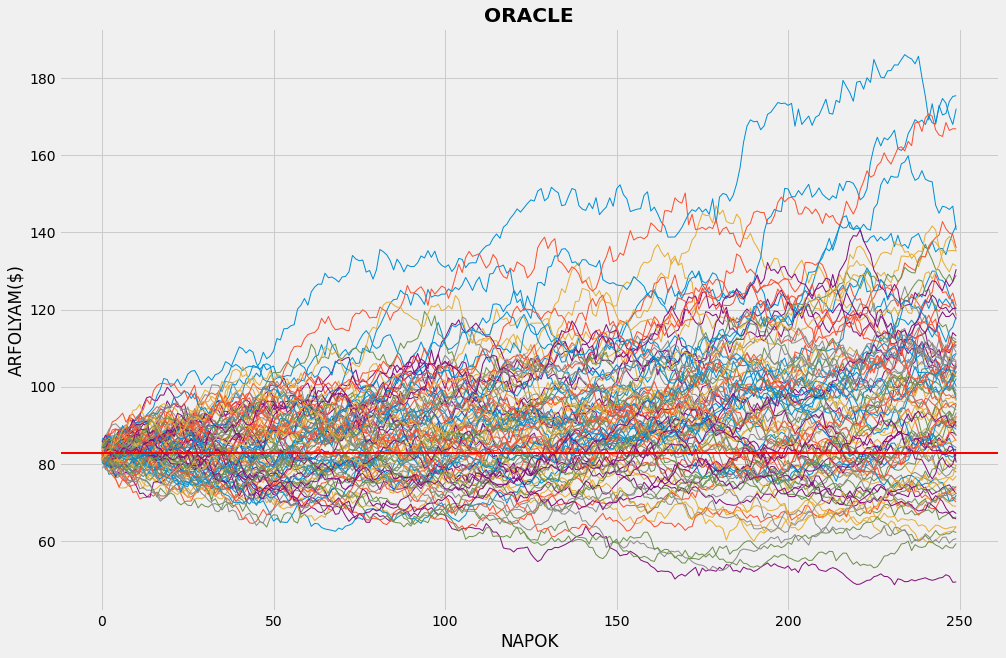

In [13]:
#Oracle:
n = 100
days = 250 #1 ev

orcl_mu = returns['ORCL'].mean()
orcl_sigma = returns['ORCL'].std()

orcl_last_price = dataframe['ORCL'].iloc[-1]
orcl_sim_returns = np.random.normal(orcl_mu, orcl_sigma, days)
orcl_sim_prices = orcl_last_price * (orcl_sim_returns + 1).cumprod()

plt.figure(figsize=(15,10))
plt.xlabel('NAPOK')
plt.ylabel('ARFOLYAM($)')
plt.title("ORACLE", fontweight='bold')

for i in range(n):
    orcl_sim_returns = np.random.normal(orcl_mu, orcl_sigma, days)
    orcl_sim_prices = orcl_last_price * (orcl_sim_returns + 1).cumprod()
    plt.axhline(orcl_last_price, color="red", lw=2)
    plt.plot(orcl_sim_prices, lw=1)
    
plt.show()

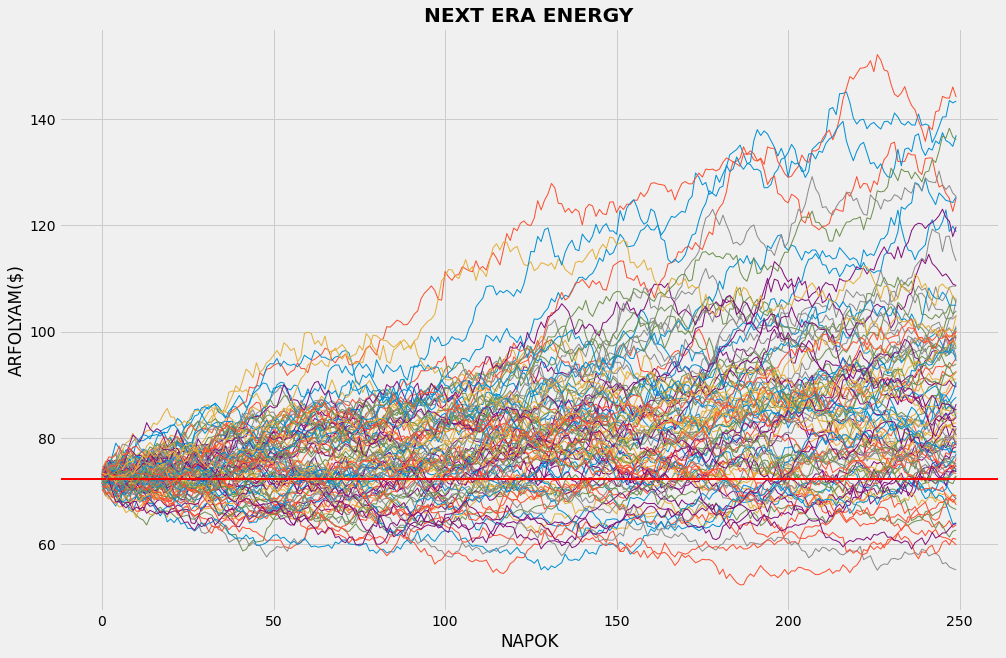

In [14]:
#Next Era Energy
n = 100
days = 250 #1 ev

nee_mu = returns['NEE'].mean()
nee_sigma = returns['NEE'].std()

nee_last_price = dataframe['NEE'].iloc[-1]

plt.figure(figsize=(15,10))
plt.xlabel('NAPOK')
plt.ylabel('ARFOLYAM($)')
plt.title("NEXT ERA ENERGY", fontweight='bold')

for i in range(n):
    nee_sim_returns = np.random.normal(nee_mu, nee_sigma, days)
    nee_sim_prices = nee_last_price * (nee_sim_returns + 1).cumprod()
    plt.axhline(nee_last_price, color="red", lw=2)
    plt.plot(nee_sim_prices, lw=1)
    
plt.show()

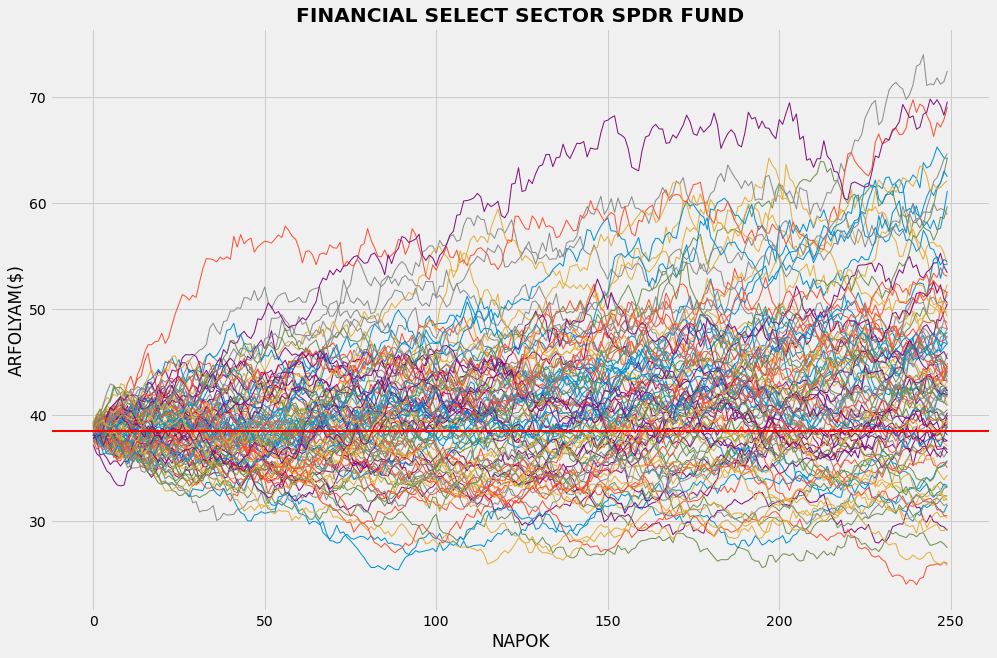

In [15]:
#Financial Select Sector SPDR Fund:
n = 100
days = 250 #1 ev

xlf_mu = returns['XLF'].mean()
xlf_sigma = returns['XLF'].std()

xlf_last_price = dataframe['XLF'].iloc[-1]

plt.figure(figsize=(15,10))
plt.xlabel('NAPOK')
plt.ylabel('ARFOLYAM($)')
plt.title("FINANCIAL SELECT SECTOR SPDR FUND", fontweight='bold')

for i in range(n):
    xlf_sim_returns = np.random.normal(xlf_mu, xlf_sigma, days)
    xlf_sim_prices = xlf_last_price * (xlf_sim_returns + 1).cumprod()
    plt.axhline(xlf_last_price, color="red", lw=2)
    plt.plot(xlf_sim_prices, lw=1)
    
plt.show()

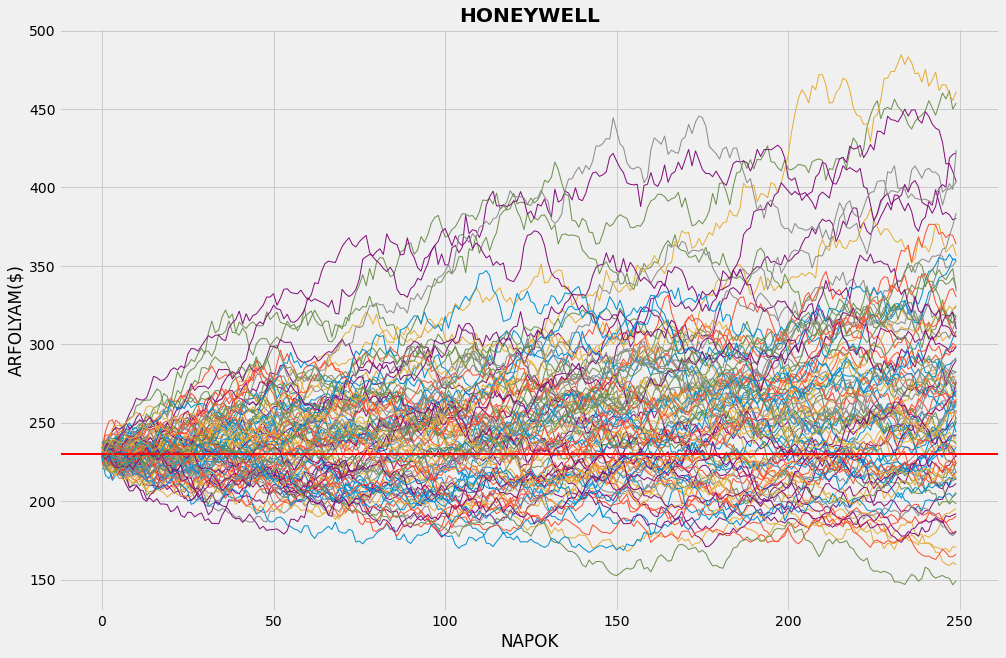

In [16]:
#Honeywell:
n = 100
days = 250 #1 ev

hon_mu = returns['HON'].mean()
hon_sigma = returns['HON'].std()

hon_last_price = dataframe['HON'].iloc[-1]

plt.figure(figsize=(15,10))
plt.xlabel('NAPOK')
plt.ylabel('ARFOLYAM($)')
plt.title("HONEYWELL", fontweight='bold')

for i in range(n):
    hon_sim_returns = np.random.normal(hon_mu, hon_sigma, days)
    hon_sim_prices = hon_last_price * (hon_sim_returns + 1).cumprod()
    plt.axhline(hon_last_price, color="red", lw=2)
    plt.plot(hon_sim_prices, lw=1)
    
plt.show()

> # <span style="font-family: JetBrains Mono; color: SteelBlue">1 DOLLAR MA HANY DOLLAR</span>

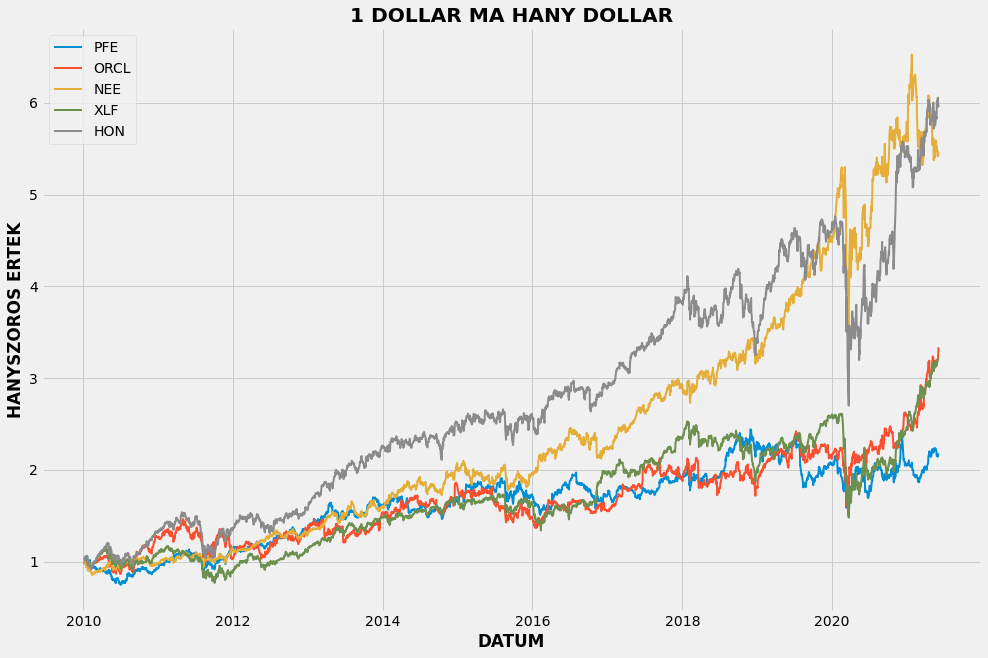

PFE: 2.18
ORCL: 3.34
NEE: 5.43
XLF: 3.22
HON: 5.98


In [17]:
plt.figure(figsize=(15,10))
cum_returns = (1 + returns).cumprod()

plt.plot(cum_returns, lw=2)
plt.legend(returns.columns)

plt.xlabel('DATUM', fontweight='bold')
plt.ylabel('HANYSZOROS ERTEK', fontweight='bold')
plt.title('1 DOLLAR MA HANY DOLLAR', fontweight='bold')
plt.show()

print('PFE: {:.2f}'.format(cum_returns.tail(1).iloc[0,0]))
print('ORCL: {:.2f}'.format(cum_returns.tail(1).iloc[0,1]))
print('NEE: {:.2f}'.format(cum_returns.tail(1).iloc[0,2]))
print('XLF: {:.2f}'.format(cum_returns.tail(1).iloc[0,3]))
print('HON: {:.2f}'.format(cum_returns.tail(1).iloc[0,4]))
